for this case, we will use tanh as the activation and see if anything changes

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
from sklearn.datasets import make_moons
import pandas as pd

X, y = make_moons(n_samples=200, noise=0.1)
df = pd.DataFrame({
    'X': X[:, 0],
    'Y': X[:, 1],
    'class': y.astype(float)
})
df.to_csv('ushape.csv', index=False)


In [24]:
df.head()

,X,Y,class
0,2.027747,0.591633,1.0
1,1.190760,-0.521253,1.0
2,0.604673,-0.443686,1.0
3,-0.735017,0.485969,0.0
4,1.899892,0.253895,1.0


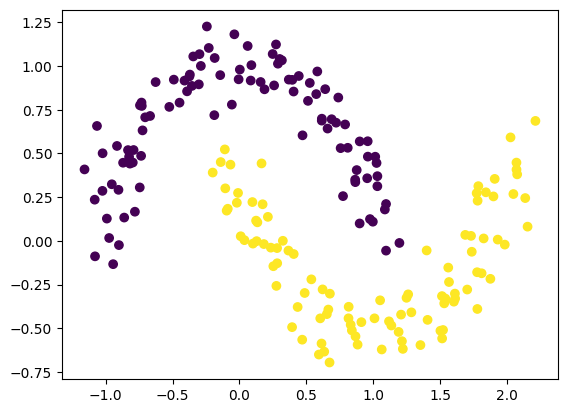

In [25]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [26]:
X=df.iloc[:,0:2].values
y=df.iloc[:,-1].values

In [27]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [28]:
model= Sequential()
model.add(Dense(2,activation='sigmoid',input_dim=2)) #hidden layer and input layer
model.add(Dense(1,activation='sigmoid')) #output sigmoid->binary classification

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.get_weights()
#these are the inital weights

[array([[ 0.5194367 ,  0.29387486],
        [ 0.1775217 , -0.48761696]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.2671908],
        [ 1.1780661]], dtype=float32),
 array([0.], dtype=float32)]

In [31]:
initial_weights= model.get_weights()

In [32]:
#set the inital weighs to zeros
initial_weights[0]=np.zeros(model.get_weights()[0].shape)
initial_weights[1]=np.zeros(model.get_weights()[1].shape)
initial_weights[2]=np.zeros(model.get_weights()[2].shape)
initial_weights[3]=np.zeros(model.get_weights()[3].shape)

In [33]:
model.set_weights(initial_weights)

In [34]:
print(initial_weights)

[array([[0., 0.],
       [0., 0.]]), array([0., 0.]), array([[0.],
       [0.]]), array([0.])]


In [35]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [36]:
history= model.fit(X,y,epochs=100,validation_steps=0.2)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4735 - loss: 0.6932  
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5020 - loss: 0.6931 
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5008 - loss: 0.6931 
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5092 - loss: 0.6931 
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5329 - loss: 0.6930 
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4984 - loss: 0.6931  
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4975 - loss: 0.6931 
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5072 - loss: 0.6931 
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5158 - loss: 0.6931 
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5133 - loss: 0.6931 
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4877 - loss: 0.6931 
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4915 - l

In [37]:
model.get_weights() # new weights after training

[array([[ 1.0563624,  1.0563624],
        [-1.1954024, -1.1954024]], dtype=float32),
 array([-0.34262416, -0.34262416], dtype=float32),
 array([[0.4412408],
        [0.4412408]], dtype=float32),
 array([-0.187544], dtype=float32)]

In [38]:
# As we can see, initializing all weights to zero caused symmetry — both neurons learned the same thing.
# The first two weights of the first neuron are identical, and the same happens for the second neuron.
# The weights didn’t update properly, leading to poor model performance.


9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


<Axes: >

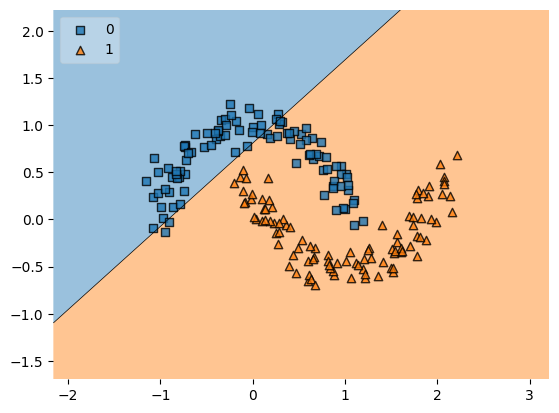

In [39]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

In [40]:
# if we see, bluepoints= 0,   yellow points =1
#meainig, it is telling even the blue points are yellow and not recognizing them